# **PARTITION LAYOUT**

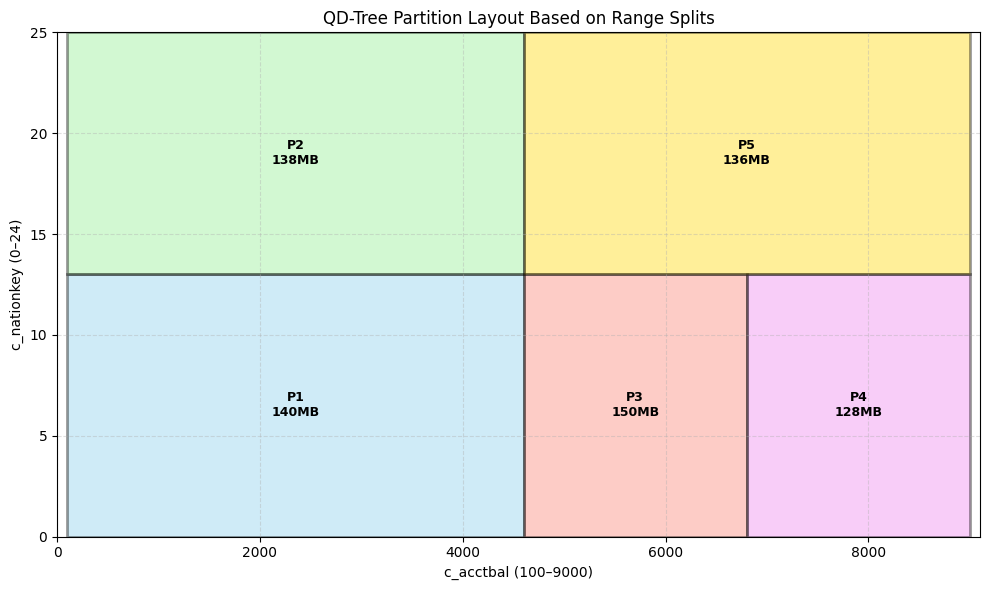

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -----------------------------
# Partition Summary
# -----------------------------
partition_summary = pd.DataFrame({
    'Partition': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'Size_MB': [140, 138, 150, 128, 136]
})

# -----------------------------
# Partition Layout Function
# -----------------------------
def plot_partition_layout(partition_info):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define layout: each rectangle corresponds to a partition with given range
    layout = [
        {'id': 'P1', 'x': 100, 'y': 0, 'width': 4600 - 100, 'height': 13, 'color': 'skyblue'},
        {'id': 'P2', 'x': 100, 'y': 13, 'width': 4600 - 100, 'height': 12, 'color': 'lightgreen'},
        {'id': 'P3', 'x': 4601, 'y': 0, 'width': 6800 - 4601, 'height': 13, 'color': 'salmon'},
        {'id': 'P4', 'x': 6801, 'y': 0, 'width': 9000 - 6801, 'height': 13, 'color': 'violet'},
        {'id': 'P5', 'x': 4601, 'y': 13, 'width': 9000 - 4601, 'height': 12, 'color': 'gold'}
    ]

    for part in layout:
        size_mb = partition_info[partition_info['Partition'] == part['id']]['Size_MB'].values[0]
        rect = patches.Rectangle((part['x'], part['y']), part['width'], part['height'],
                                 linewidth=2, edgecolor='black', facecolor=part['color'], alpha=0.4)
        ax.add_patch(rect)
        ax.text(part['x'] + part['width']/2, part['y'] + part['height']/2,
                f"{part['id']}\n{size_mb}MB", ha='center', va='center', fontsize=9, weight='bold')

    # Axes and labels
    ax.set_xlim(0, 9100)
    ax.set_ylim(0, 25)
    ax.set_xlabel("c_acctbal (100–9000)")
    ax.set_ylabel("c_nationkey (0–24)")
    ax.set_title("QD-Tree Partition Layout Based on Range Splits")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Run the Visualization
# -----------------------------
plot_partition_layout(partition_summary)
